# Predicting length of ICU stay for a patient

### Importing necessary libraries - 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import os
sns.set()
# Access data.
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Data extracted for predicting length of stay is loaded :

In [ ]:
oversample = SMOTE()
scaler = StandardScaler()

In [ ]:
uploaded = files.upload()

Saving losdata.csv to losdata (1).csv


In [ ]:
import io
icudata = pd.read_csv(io.BytesIO(uploaded['losdata.csv']))

In [ ]:
icudata

,age,height,weight,eyes,motor,verbal,GCSTotal,temperature,respiratoryrate,heartrate,glucose,O2,fio2,ph,los,SBP,DBP,MAP,ethnicity,gender,diag_,"diag_ARDS-adult respiratory distress syndrome, non-cardiogenic pulmonary edema",diag_Abdomen only trauma,diag_Abdomen/extremity trauma,diag_Abdomen/face trauma,diag_Abdomen/multiple trauma,diag_Abdomen/pelvis trauma,diag_Abdomen/spinal trauma,diag_Ablation or mapping of cardiac conduction pathway,"diag_Abscess, neurologic","diag_Abscess/infection-cranial, surgery for",diag_Acid-base/electrolyte disturbance,diag_Adrenal neoplasm (including pheochromocytoma),diag_Adrenalectomy,diag_Alcohol withdrawal,diag_Amputation (non-traumatic),diag_Anaphylaxis,"diag_Anastomosis, vascular",diag_Anemia,"diag_Aneurysm repair, ventricular",...,diag_Spinal/multiple trauma,diag_Splenectomy,diag_Stereotactic procedure,diag_Subarachnoid hemorrhage/arteriovenous malformation,diag_Subarachnoid hemorrhage/intracranial aneurysm,"diag_Subarachnoid hemorrhage/intracranial aneurysm, surgery for","diag_TURP, transurethral prostate resection for benign prostatic hypertrophy","diag_TURP, transurethral prostate resection for cancer","diag_Tamponade, pericardial","diag_Thoracotomy for benign tumor (i.e. mediastinal chest wall mass, thymectomy)",diag_Thoracotomy for bronchopleural fistula,diag_Thoracotomy for esophageal cancer,diag_Thoracotomy for lung cancer,diag_Thoracotomy for lung reduction,diag_Thoracotomy for other malignancy in chest,diag_Thoracotomy for other reasons,diag_Thoracotomy for pleural disease,diag_Thoracotomy for thoracic/respiratory infection,diag_Thrombectomy (with general anesthesia),diag_Thrombectomy (without general anesthesia),diag_Thrombocytopenia,"diag_Thrombosis, vascular (deep vein)","diag_Thrombus, arterial",diag_Thyroidectomy,"diag_Toxicity, drug (i.e., beta blockers, calcium channel blockers, etc.)",diag_Tracheostomy,diag_Transphenoidal surgery,"diag_Transplant, other","diag_Trauma medical, other","diag_Trauma surgery, other",diag_Tricuspid valve surgery,"diag_Tumor removal, intracardiac","diag_Vascular medical, other","diag_Vascular surgery, other",diag_Vena cava clipping,diag_Vena cava filter insertion,diag_Ventricular Septal Defect (VSD) Repair,diag_Ventriculostomy,diag_Weaning from mechanical ventilation (transfer from other unit or hospital only),diag_Whipple-surgery for pancreatic cancer
0,81.0,165.1,61.70,4.0,6.0,5.0,15.0,34.8,5.0,114.0,185.0,95.0,60.0,7.390,10.893056,103.366634,55.650501,71.555879,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,59.0,180.3,92.30,4.0,6.0,5.0,15.0,37.2,10.0,114.0,121.0,98.0,21.0,6.700,10.679861,132.334862,57.155963,82.215596,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45.0,170.2,79.90,4.0,6.0,5.0,15.0,36.9,14.0,82.0,273.0,96.0,100.0,7.140,0.309722,99.379982,56.571429,67.966253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,81.0,180.3,87.50,4.0,6.0,5.0,15.0,35.6,9.0,55.0,111.0,99.0,32.0,7.350,1.938194,135.596491,60.290448,85.392463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,80.0,170.2,103.30,4.0,6.0,5.0,15.0,36.6,55.0,102.0,273.0,97.0,21.0,6.700,3.610417,112.200000,59.900000,77.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23513,51.0,180.3,59.00,4.0,6.0,3.0,13.0,34.4,26.0,55.0,192.0,92.0,100.0,7.444,11.053472,13

In [ ]:
icudata = icudata.dropna()
icudata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23518 entries, 0 to 23517
Columns: 384 entries, age to diag_Whipple-surgery for pancreatic cancer
dtypes: float64(18), int64(366)
memory usage: 69.1 MB


### Scaling features and the target variable

In [ ]:
x = icudata
y = x.pop('los')

In [ ]:
y = y.to_numpy()
y = y.reshape((-1,1))
y = scaler.fit_transform(y)
x = scaler.fit_transform(x)

### Splitting into training and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,    #splitting 
                                                    test_size=0.25, 
                                                    random_state=0)

In [ ]:
feature_vector_length = 383
num_classes = 1

### Adding layers to the neural network

In [ ]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (383,)


In [ ]:
model = Sequential()
model.add(Dense(300,input_shape=input_shape,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(num_classes))

In [ ]:
model.output_shape

(None, 1)

### Compiling and validating the model using validation data

In [ ]:
#optimizer = tf.keras.optimizers.RMSprop(0.008)
model.compile(loss='mse', 
              optimizer='adam') # SGD, RMSProp, Adagrad)
history = model.fit(x_train, 
          y_train, 
          epochs=50, 
          batch_size=100, 
          verbose=1, 
          validation_split=0.2)

Train on 14110 samples, validate on 3528 samples
Epoch 1/50
14110/14110 [==============================] - 2s 111us/step - loss: 0.9065 - val_loss: 0.8886
Epoch 2/50
14110/14110 [==============================] - 2s 107us/step - loss: 0.8343 - val_loss: 0.8986
Epoch 3/50
14110/14110 [==============================] - 2s 108us/step - loss: 0.7991 - val_loss: 0.8693
Epoch 4/50
14110/14110 [==============================] - 1s 104us/step - loss: 0.7818 - val_loss: 0.8724
Epoch 5/50
14110/14110 [==============================] - 1s 100us/step - loss: 0.7609 - val_loss: 0.8650
Epoch 6/50
14110/14110 [==============================] - 1s 101us/step - loss: 0.7454 - val_loss: 0.8544
Epoch 7/50
14110/14110 [==============================] - 2s 110us/step - loss: 0.7205 - val_loss: 0.8759
Epoch 8/50
14110/14110 [==============================] - 2s 107us/step - loss: 0.7047 - val_loss: 0.8781
Epoch 9/50
14110/14110 [==============================] - 1s 103us/step - loss: 0.6851 - val_loss: 0.91

### Plot of model loss on train and validation data

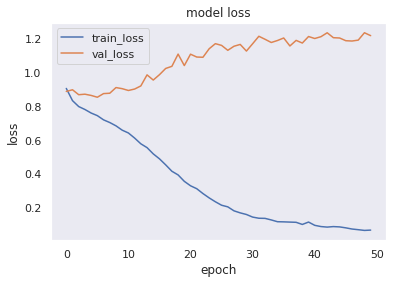

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.grid()